### Wiederholung

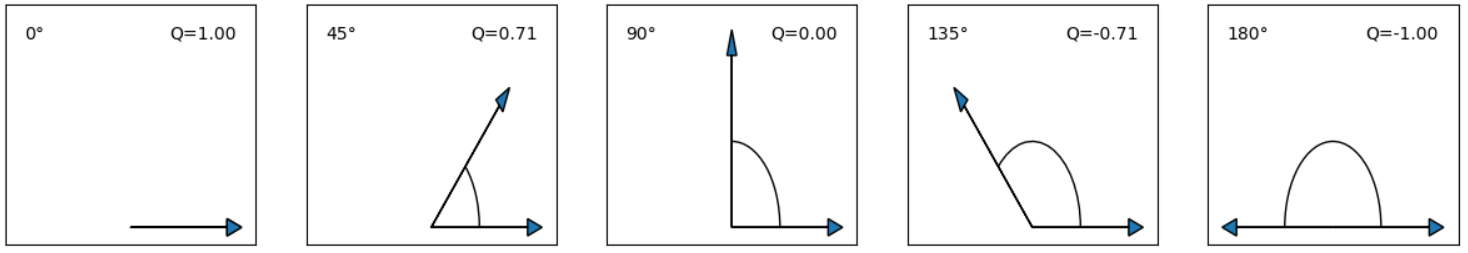

**Erinnerung:** Für den Winkel $W(u,v)$ zwischen zwei Vektoren $u,v$ mit positiver Länge gilt die Formel 
$$
\cos (W(u,v)) = \underbrace{\frac{<u,v>}{ \lVert u \rVert \cdot \lVert v \rVert}}_{\color{orange}{\text{Cosine Similarity }Q}} = <u/\lVert u \rVert, v / \lVert v \rVert>
$$
wobei $<u,v>=\sum_{i=1}^d u_i v_i$ das Skalarprodukt und $\lVert u \rVert=\sqrt{<u,u>}$ die Länge des Vektors beschreibt.

Die Cosine Similarity wird verwendet z.B. zur Abfrage "ähnlicher" Vektoren in einer Vektordatenbank:

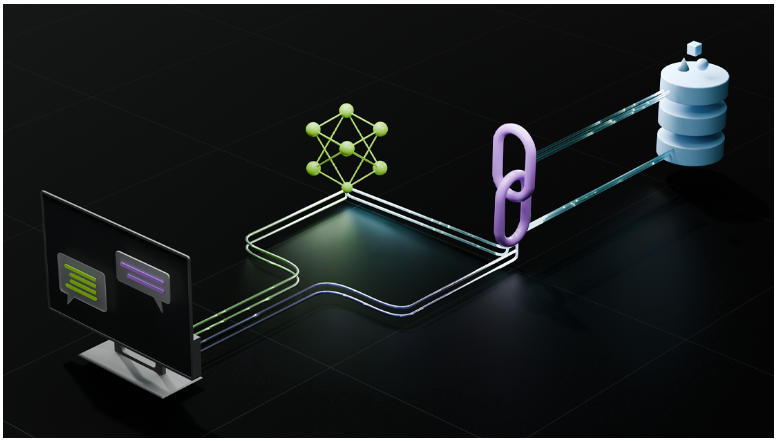

<div class="tinyfont">https://developer.nvidia.com/blog/rag-101-demystifying-retrieval-augmented-generation-pipelines/</div>

Hier z.B. für eine RAG (*Retrieval-Augmented Generation*)-Pipeline, um einem Large Language Model passenden Kontext für eine Anfrage zu liefern.

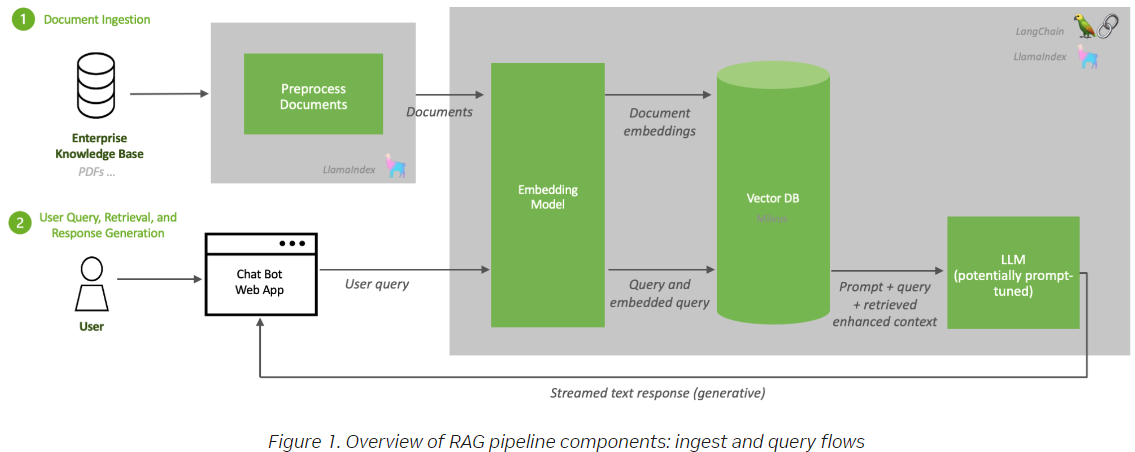

<div class="smallfont">
    Hier werden (in einem sog. Embedding-Schritt) viele Dokumente ("Hintergrundwissen") in Vektoren übersetzt und in einer Vektordatenbank abgelegt.

Eine Anfrage des Benutzers wird ebenfalls in einen Vektor übersetzt und dann dazu ähnliche (Dokument-)Vektoren in der Vektordatenbank gesucht (z.B. mittels Cosine Similarity).

Die Anfrage wird dann zusammen mit einigen ähnlichen Dokumenten dem LLM zur Beantwortung der Frage übergeben.</div>

<div class="alert alert-block alert-info">Übergang zur Korrelation durch <b>Zentrierung</b> der Vektoren (Mittelwert komponentenweise abziehen):</div>

Es seien Datenvektoren $x=(x_1,...,x_n)$ und $y=(y_1,...,y_n)$ gleicher Länge $n \ge 2$ gegeben.
- Die (empirische) **Kovarianz** ist definiert via
$$
\text{cov}(x,y) = \frac{1}{n-1} \sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})
$$

- Die (empirische) **Pearson-Korrelation** ist definiert via
$$
\text{cor}(x,y) = \frac{\text{cov}(x,y)}{\text{sd}(x) \text{sd}(y)} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n (x_i-\overline{x})^2} \sqrt{\sum_{i=1}^n (y_i-\overline{y})^2}}
$$

Die Korrelation ist ein gutes Maß für den **linearen** Zusammenhang:
<br><br>
<center>
<img src="VL10_Material/correlation.png" width="100%" />
<div class="tinyfont">https://en.wikipedia.org/wiki/Correlation</div>
</center>
<br><br>
Insbesondere impliziert i.A. Korrelation=0 nicht die Unabhängigkeit (Abwesenheit von Kausalität) zwischen zwei Datenquellen. 

<img src="VL08_Material/daikatu_leastsquares.jpg" />
<div class="tinyfont">von: Jepson Taylor, Dataiku<br>(generiert mit MidJourney)</div>

# <div style="color:blue;">1. Lineare Regression</div>
# <div>2. Gesundheitsdaten</div>
# <div>3. Gradient Descent</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Beispiel einer Einfachen Linearen Regression

In [281]:
# Der sklearn diabetes-Datensatz
from sklearn.datasets import load_diabetes
X = load_diabetes(as_frame=True)

# Daten extrahieren
X,y = X["data"], X["target"]
df = pd.concat([X,y],axis=1)

# .T zum transponieren (spiegeln)
# (hier verwendet, um alle Spalten zu sehen)
df.head().T


,0,1,2,3,4
age,0.038076,-0.001882,0.085299,-0.089063,0.005383
sex,0.050680,-0.044642,0.050680,-0.044642,-0.044642
bmi,0.061696,-0.051474,0.044451,-0.011595,-0.036385
bp,0.021872,-0.026328,-0.005670,-0.036656,0.021872
s1,-0.044223,-0.008449,-0.045599,0.012191,0.003935
s2,-0.034821,-0.019163,-0.034194,0.024991,0.015596
s3,-0.043401,0.074412,-0.032356,-0.036038,0.008142
s4,-0.002592,-0.039493,-0.002592,0.034309,-0.002592
s5,0.019907,-0.068332,0.002861,0.022688,-0.031988
s6,-0.017646,-0.092204,-0.025930,-0.009362,-0.046641


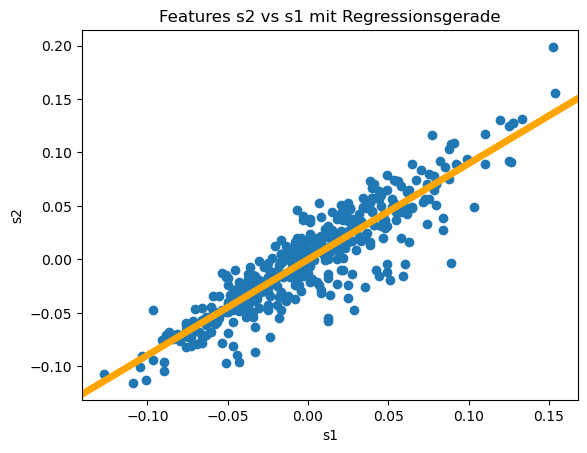

In [296]:
# Alternative: df.plot.scatter("s1","s2");
plt.scatter ( df["s1"], df["s2"] )
plt.xlabel("s1")
plt.ylabel("s2")

# Berechne die Regressionsgerade
# (Alternative zu sklearn LinearRegression())
slope, intercept = np.polyfit(df["s1"],df["s2"],
                              deg=1)
plt.axline ( xy1=(0,intercept), slope=slope,
             color="orange", linewidth=5 )
plt.title("Features s2 vs s1 mit Regressionsgerade");


**Lineare Regression**:

- **"einfach"**, wenn ein linearer Zusammenhang nur eines Features $x_1$ zu einer Zielgröße $y$ gesucht wird;

- **"multiple"**, wenn ein linearer Zusammenhang mehrerer Features $x_1,...,x_k$ zu einer Zielgröße $y$ gesucht wird.

**Modell:**
$$
f_{a_0,...,a_k}(x_1,...,x_k) = a_0 + a_1\cdot x_1 + ... + a_k \cdot x_k
$$

**Methode der kleinsten Quadrate:** Die Koeffizienten werden so bestimmt, dass $
MSE( y, f_{...}(...) ) $ minimal wird, wobei
$$
MSE ( y, \hat{y} ) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2\ .
$$
Hierbei kürzen wir ab: $f_{a_0,...,a_k}(x_{i1},...,x_{ik}) = \hat{y}_i$.

In [10]:
from sklearn.metrics import mean_squared_error

y     = (3,4,5)
y_hat = (3.1,4.2,5.3)

mse = lambda y,z: ( (np.array(y)-np.array(z))**2 ) \
                    .mean()

mean_squared_error(y,y_hat), mse (y,y_hat)

(0.04666666666666666, 0.04666666666666666)

**Lineare Regression**:

- **"einfach"**, wenn ein linearer Zusammenhang nur eines Features $x_1$ zu einer Zielgröße $y$ gesucht wird;

- **"multiple"**, wenn ein linearer Zusammenhang mehrerer Features $x_1,...,x_k$ zu einer Zielgröße $y$ gesucht wird.

**Modell:**
$$
f_{a_0,...,a_k}(x_1,...,x_k) = a_0 + a_1\cdot x_1 + ... + a_k \cdot x_k
$$

**Methode der kleinsten Quadrate:** Die Koeffizienten werden so bestimmt, dass $
MSE( y, f_{...}(...) ) $ minimal wird, wobei
$$
MSE ( y, \hat{y} ) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2\ .
$$
Hierbei kürzen wir ab: $f_{a_0,...,a_k}(x_{i1},...,x_{ik}) = \hat{y}_i$.

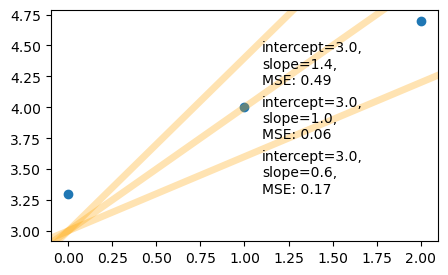

In [351]:
# Beispiel für eine einfache lineare Regression
x = np.array([0.0,1.0,2.0])
y = np.array([3.3,4.0,4.7])
plt.scatter ( x, y );
plt.gcf().set_size_inches( (5,3) )

# Kandidaten-Modelle (fixiere intercept=3.0)
intercept=3.0
f = lambda x, intercept, slope: intercept+slope*x

# Variiere den Slope Parameter
for slope in [0.6,1.0,1.4]:
    plt.axline ( xy1=(0,intercept), slope=slope,
         color="orange", alpha=0.3, linewidth=5 )
    plt.text(s="intercept={0},\nslope={1},\nMSE: {2:.2f}"
            .format(intercept, slope,
                    mse(y,f(x,intercept,slope))),
             x=1.1, y=f(1.1,intercept,slope),
             color="black", va="top" )
    

### 1.2 Herleitung der Koeffizienten

Es seien $x,y$ Vektoren der Länge $n$.  

**Ziel:** Minimiere $MSE( y, f_{a_0,a_1}(x) )$ als Funktion von $a_0, a_1$.  

**Ansatz:**

\begin{align*}
\frac{\partial}{\partial a_0} MSE( y, f_{a_0,a_1}(x) ) &= 0 \ , \\
\frac{\partial}{\partial a_1} MSE( y, f_{a_0,a_1}(x) ) &= 0 \ .
\end{align*}

Ausgeschrieben:
\begin{align*}
MSE( y, f_{a_0,a_1}(x) ) &= \frac{1}{n} \sum_{i=1}^n ( y_i - f_{a_0,a_1}(x_i) )^2 \\
&= \frac{1}{n} \sum_{i=1}^n ( y_i - a_0 - a_1\cdot x_i )^2 
\end{align*}

**Ergebnis** für eine einfache Lineare Regression:

\begin{align*}
a_0 &= \overline{y} - a_1\cdot \overline{x} \ , \\
a_1 &= \text{cor}(x,y)\frac{\text{sd(y)}}{\text{sd(x)}} \ .
\end{align*}

Hierbei ist der *Mittelwert*, die *Standardabweichung* und die *(Pearson-)Korrelation* definiert via
\begin{align*}
\overline{x} &= \frac{1}{n} \sum_{i=1}^n x_i\ , \\
\text{sd(x)} &= \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i-\overline{x})^2 }\, ,\\
\text{cor}(x,y) &= \frac{ \tfrac {1}{n-1} \sum_{i=1}^{n}
(x_i-\overline{x})(y_i-\overline{y})
}{ \text{sd(x)} \text{sd(y)} }\ .
\end{align*}

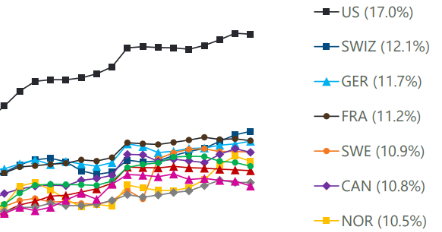

# <div>1. Lineare Regression</div>
# <div style="color:blue;">2. Gesundheitsdaten</div>
# <div>3. Gradient Descent</div>

### 2. Gesundheitsdaten
&nbsp;
- Wie hoch sind die Gesundheitsausgaben pro Person?
- Wie gut ist das deutsche Gesundheitssystem im internationalen Vergleich?
- Wie können wir "Erfolg im Gesundheitswesen" quantifizieren?

<center><img src="VL09_Material/healthdata_01.png" width="50%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020</div><br>
    <b>pro Kopf:</b> ca. 11 000\$ USA und 6 000\$ DE (Durchschnittswert über alle Altersgruppen)</center>

<center><div class="alert alert-block alert-warning"><b>Frage:</b> Was ist eine gute Metrik, um den Nutzen der Ausgaben zu bewerten?</div></center>

<center><img src="VL09_Material/healthdata_02.png" width="40%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br>
    <b>Zum Vergleich:</b> Südafrika ca. 57 Jahre (Vergleichswert von 2013, gemittelt über m/w/d)</center>

<center><div class="alert alert-block alert-warning"><b>Frage:</b> Warum sind die US-Werte (im Mittel) so schlecht, obwohl die Ausgaben dort (im Mittel) am höchsten sind?</div></center>

<center><b>Hypothese:</b> Ein Grund für die hohen Gesundheitsausgaben könnte eine hohe Spreizung "zwischen Arm und Reich" in den USA sein. Der Mittelwert würde durch wenig Reiche mit hohen Ausgaben verzerrt. (Oder es gibt andere US-spezifische Gründe, z.B. Lifestyle.)</center>

<center><img src="VL09_Material/healthdata_03.png" width="50%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div></center>

<center><div class="alert alert-block alert-warning"><b>Frage:</b> Bedeutet das, dass das US-Gesundheitssystem schlechter ist?</div></center>

<center><b>Nicht unbedingt</b>, denn a) es kann im Hintergrund wirkende Kausalzusammenhänge geben<br>(allgemein: "Confounding Factors", hier z.B. Lifestyle),<br>b) es könnte sogar ein Hinweis auf ein "gutes" Gesundheitssystem sein (mehr frühzeitig diagnostizierte Krankheiten).</center>

<center><img src="VL09_Material/healthdata_04.png" width="50%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br><br>
    <b>Eine mögliche Ursache (?)</b> für chronische Krankheiten (möglicher <i>Confounding Factor</i>)

<center><div class="alert alert-block alert-warning"><b>Frage:</b> Gibt es neben der Lebenserwartung andere Metriken für "Erfolg im Gesundheitswesen"?</div></center>

<center><img src="VL09_Material/healthdata_09.png" width="60%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div></center>

<center><div class="alert alert-block alert-warning"><b>Frage:</b> Ist die "Five-Year survival rate" eine gute Metrik?</div></center>

<center>
    Hier am Beispiel <b>Brustkrebs</b>:<br><br>
    <img src="VL09_Material/healthdata_0809.png" width="60%" />
<div class="tinyfont">Eigene Darstellung, basierend auf: Multinational Comparisons of Health Systems Data, 2020.<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br>

<center><br><br><b>Unklar,</b> ob eine höhere "Five-Year survival rate" nicht einfach<br>auf eine frühere Diagnose zurückzuführen ist ("Lead Time Bias").</center>

<br><b>Lead Time Bias:</b><br><br><img src="VL09_Material/Lead_time_bias.svg.png" /> <div class="tinyfont">https://en.wikipedia.org/wiki/Lead_time_bias</div>

<img src="VL09_Material/quote.png" />
...
<br><br>
<div class="smallfont">(1956) Criticism of Present Methods of Analysis, Acta Radiologica,
45:sup132, 19-25, DOI: 10.3109/00016925609172299
 https://www.tandfonline.com/doi/pdf/10.3109/00016925609172299
</div>

<center><img src="VL09_Material/healthdata_08.png" width="60%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br><br>
<b>Deutsche Besonderheiten:</b> Niedrige (Grippe-)Impfraten...

<center><img src="VL09_Material/healthdata_05.png" width="60%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br><br>
<b>Deutsche Besonderheiten:</b> ... viele Arztbesuche ...

<center><img src="VL09_Material/healthdata_06.png" width="50%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br><br>
<b>Deutsche Besonderheiten:</b> ... lange Krankenhausaufenthalte ...

<center><img src="VL09_Material/healthdata_07.png" width="50%" />
<div class="tinyfont">Multinational Comparisons of Health Systems Data, 2020. (The Commonwealth Fund, Datenquelle: OECD)<br>
    https://www.commonwealthfund.org/publications/other-publication/2021/feb/multinational-comparisons-health-systems-data-2020 , https://stats.oecd.org/</div><br><br>
<b>Deutsche Besonderheiten:</b> ... und viele MRT-Aufnahmen!

<center><img src="VL09_Material/statista.png" width="60%" />
<div class="tinyfont">Evaluate. (26. September, 2018). Top 10 Medizintechnikunternehmen nach weltweiten Marktanteilen im Segment bildgebende Diagnostik im Jahr 2017 und Prognose für das Jahr 2024 [Graph]. In Statista. <br> Zugriff am 22. Mai 2023, von https://de.statista.com/statistik/daten/studie/332494/umfrage/fuehrende-medizintechnikunternehmen-nach-weltweiten-marktanteilen-im-segment-bildgebende-diagnostik/</div></center>

**Fazit:**
- Der Erfolg einer Behandlung (oder allgemeiner von Gesundheitsausgaben) ist schwer zu messen.
- Populäre Metriken wie "Five-Years Survival Rate" sind kritisch zu sehen;<br>können aber sinnvoll sein in kontrollierten Vergleichen (Behandlung A vs Behandlung B).
- Die Bewertung ist schwierig v.a. wegen der vielfältigen Einflussfaktoren, die ein Behandlungsergebnis beeinflussen.
- Ein Einflussfaktor ist der Zeitpunkt der Diagnose. Eine frühere Diagnose kann scheinbar zu einer Erhöhung der "Five-Years Survival Rate" führen (*Lead Time Bias*).

**Konsequenzen**:
- Früherkennungsverfahren sollten gut durchdacht sein<br>(insb. nur dann anwenden, wenn es gute Behandlungsoptionen gibt); <span class="tinyfont">siehe z.B. "Wilson and Jungner"-Kriterien der WHO</span>
- Zur Bewertung von Behandlungen sind **kontrollierte klinische Studien** notwendig ("Phase I/Phase II/Phase III"). Insbesondere notwendig:<br>&nbsp;
    - Ein klar definiertes Ziel ("Endpunkt");
    - eine ähnlich zusammengesetzte Vergleichsgruppe, die die Behandlung nicht bekommt ("Kontrollgruppe");
    - eine zufällige Zuweisung auf Kontroll- und Experimentalgruppe ("Verblindung").

<img src="VL08_Material/daikatu_gradientdescent.jpg" />
<div class="tinyfont">von: Jepson Taylor, Dataiku<br>(generiert mit MidJourney)</div>

# <div>1. Lineare Regression</div>
# <div>2. Gesundheitsdaten</div>
# <div style="color:blue;">3. Gradient Descent</div>

<center><img src="VL06_Material/gradientdescent.png" width="70%" />
<div class="tinyfont">https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg</div></center>

Lineare Regression $f_{a_0,a_1}(x) = a_0+a_1\cdot x$.

Bisher: Minimiere $MSE( y, f_{a_0,a_1}(x) )$ als Funktion von $a_0, a_1$, indem die partielle Ableitungen $\frac{\partial}{\partial a_i} MSE( y, f_{a_0,a_1}(x) )$ Null gesetzt werden.

Alternativ: Iterative Lösung mittels **Gradient Descent**:

<div class="smallfont">

&nbsp;
1. Fixiere eine Learning Rate $\alpha$ (z.B. 0.1).
2. Wähle Parameter $(a_0, a_1)$ zufällig.
3. Berechne den Fehler $MSE( y, f_{a_0,a_1}(x) )$.  
Breche ab, wenn der Fehler (oder die Fehleränderung) kleiner als eine vorgegebene Schranke ist.
4. Berechne die Richtung des stärksten Fehleranstiegs:
$$v_0 = \partial/\partial{a_0} MSE( y, f_{a_0,a_1}(x) )$$ und $$v_1 = \partial/\partial{a_1} MSE( y, f_{a_0,a_1}(x) )$$ an der Stelle $(a_0, a_1)$.
5. Ersetze $a_0$ durch $a_0 - \alpha v_0$  
und $a_1$ durch $a_1 - \alpha v_1$.
6. Iteriere Schritte 3.-6.

</div>

<center><img src="VL06_Material/gradientdescent.png" width="70%" />
<div class="tinyfont">https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg</div></center>

Bei der linearen Regression $f_{a_0,a_1}(x)=a_0+a_1x$, wenn Punkte $(x_1,y_1),...,(x_n,y_n)$ gegeben sind:

\begin{align*}
v_0 &= \partial/\partial{a_0} MSE( {\bf y}, f_{a_0,a_1}({\bf x}) ) \\
&= \partial/\partial{a_0} \frac{1}{n}\sum_{i=1}^n (y_i-a_0-a_1\cdot x_i)^2 \\
&= - \frac{2}{n} \sum_{i=1}^n (y_i-a_0-a_1\cdot x_i)
\end{align*}

und
\begin{align*}
v_1 &= \partial/\partial{a_1} MSE( {\bf y}, f_{a_0,a_1}({\bf x}) ) \\
&= - \frac{2}{n} \sum_{i=1}^n x_i (y_i-a_0-a_1\cdot x_i)
\end{align*}

**Schematisch** für eine Lineare Regression $\hat{y}_i=a_0+a_1\cdot x_{i}$:

<img src="VL08_Material/training_schematisch_1.png" />

**Stochastic Gradient Descent:** Berechne die Gradienten nur auf zufällig gewählten kleineren Datenmengen.

<img src="VL08_Material/training_schematisch_2.png" />

Analog, wenn das Verfahren mehr Parameter hat oder mehr als ein Feature vorliegt  
(z.B. Multiple Lineare Regression $\hat{y}_i=a_0+a_1\cdot x_{i1} + ... + a_d \cdot x_{id}$):

<img src="VL08_Material/training_schematisch_3.png" />

Das Machine Learning Verfahren könnte genauso ein **Neuronales Netzwerk** sein  
(und bei geeigneter Loss-Funktion auch eine Klassifikation statt Regression):

<img src="VL08_Material/training_schematisch_4.png" />

**Beispiel:** Die Features könnten Pixel sein. <br><span class="smallfont">(in diesem Klassifikationstask würde man sich die CrossEntropyLoss anschauen; die Vorhersage wäre ein Wahrscheinlichkeitsvektor)</span>

<img src="VL08_Material/training_schematisch_5.png" />

**Neuronale Netzwerke** sind typischerweise in Schichten aufgebaut (hier ein CNN=*Convolutional Neural Network*):

<figure>
    <center>
      <img src="./VL07_Material/CNN.png" width="700"/>
      <figcaption class="tinyfont">Wang, J.J., Hu, S.G., Zhan, X.T. et al. Handwritten-Digit Recognition by Hybrid Convolutional Neural Network based on HfO2 Memristive Spiking-Neuron. Sci Rep 8, 12546 (2018)</figcaption>
    </center>
</figure>

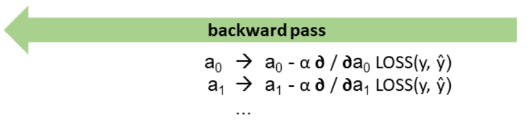

**"Schichten"**: Die Vorhersage $\hat{y}$ kann als Hintereinanderausführung verschiedener Funktionen dargestellt werden:

$$\hat{y} = f_n(f_{n-1}(...(f_1(x))))$$

In der Ableitung $\partial/\partial{a_0} \text{LOSS}( y, \hat{y} )$ kann daher die **Kettenregel** verwendet werden:

$$
\partial/\partial{a_0} f_2 ( f_1(x; a_0) ) = (\partial/\partial{a_0} f_2)(f_1(x; a_0)) \cdot \partial/\partial{a_0}f_1(x; a_0)
$$

Die Optimierung aller Parameter eines neuronalen Netzwerks mittels der Kettenregel nennt man **Back Propagation**.

<img src="VL08_Material/daikatu_gradientdescent.jpg" />
<div class="tinyfont">von: Jepson Taylor, Dataiku<br>(generiert mit MidJourney)</div>

# <div style="color:gray;">1. Lineare Regression</div>
# <div style="color:gray;">2. Gesundheitsdaten</div>
# <div style="color:gray;">3. Gradient Descent</div>
# Vielen Dank für Ihre Aufmerksamkeit!